In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
data = pd.read_parquet('/main/data/MVideo_2/dataset_main_6_m_2.parquet')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1163328 entries, 0 to 1163327
Columns: 102 entries, STORE_ID to UNITS_SOLD_P2
dtypes: category(8), datetime64[ns](1), float32(77), int32(16)
memory usage: 441.6 MB


In [5]:
data_train = data[data.DATE < '2018-01-28']

In [6]:
data_train.shape[0]

894852

In [7]:
data_train2 = data[data.DATE <= '2018-02-18']

In [8]:
data_train2.shape[0]

1026469

In [9]:
data_val = data[(data.DATE >= '2018-01-28') & (data.DATE <= '2018-02-18')]

In [10]:
data_val.shape[0]

131617

In [11]:
data_test = data[data.DATE == '2018-03-18']

In [12]:
data_test.shape[0]

34790

In [13]:
feat = [s for s in data.columns if s not in ['DATE', 'UNITS_SOLD_P2']]

In [14]:
dts = lgb.Dataset(data_train[feat], label = data_train.UNITS_SOLD_P2)

In [15]:
dts = dts.construct()

In [16]:
dtsv = dts.create_valid(data_val[feat], label = data_val.UNITS_SOLD_P2)

In [17]:
params = {'application': 'regression_l2',
 'learning_rate': 0.01,
 'num_leaves': 511,
 'min_data_in_leaf': 130,
 'min_sum_hessian_in_leaf': 0.001,
 'feature_fraction': 0.6,
 'bagging_fraction': 0.7,
 'bagging_freq': 1,
 'lambda_l2': 0.1713,
 'metric': 'l2_root'}

In [18]:
bst = lgb.train(params, dts, valid_sets = [dtsv], valid_names = ['Validation'],
                num_boost_round = 10000, early_stopping_rounds = 20)

[1]	Validation's rmse: 2.33209
Training until validation scores don't improve for 20 rounds.
[2]	Validation's rmse: 2.32188
[3]	Validation's rmse: 2.31114
[4]	Validation's rmse: 2.3004
[5]	Validation's rmse: 2.29002
[6]	Validation's rmse: 2.28063
[7]	Validation's rmse: 2.27034
[8]	Validation's rmse: 2.26062
[9]	Validation's rmse: 2.24924
[10]	Validation's rmse: 2.23886
[11]	Validation's rmse: 2.22893
[12]	Validation's rmse: 2.2186
[13]	Validation's rmse: 2.20806
[14]	Validation's rmse: 2.19834
[15]	Validation's rmse: 2.1897
[16]	Validation's rmse: 2.18141
[17]	Validation's rmse: 2.17383
[18]	Validation's rmse: 2.16449
[19]	Validation's rmse: 2.15647
[20]	Validation's rmse: 2.14842
[21]	Validation's rmse: 2.13953
[22]	Validation's rmse: 2.13055
[23]	Validation's rmse: 2.12163
[24]	Validation's rmse: 2.11226
[25]	Validation's rmse: 2.10341
[26]	Validation's rmse: 2.09633
[27]	Validation's rmse: 2.08903
[28]	Validation's rmse: 2.0816
[29]	Validation's rmse: 2.07447
[30]	Validation's rmse:

[252]	Validation's rmse: 1.62038
[253]	Validation's rmse: 1.62018
[254]	Validation's rmse: 1.61987
[255]	Validation's rmse: 1.61958
[256]	Validation's rmse: 1.61942
[257]	Validation's rmse: 1.6192
[258]	Validation's rmse: 1.6189
[259]	Validation's rmse: 1.61867
[260]	Validation's rmse: 1.61835
[261]	Validation's rmse: 1.61813
[262]	Validation's rmse: 1.61779
[263]	Validation's rmse: 1.61754
[264]	Validation's rmse: 1.61733
[265]	Validation's rmse: 1.61695
[266]	Validation's rmse: 1.61658
[267]	Validation's rmse: 1.61651
[268]	Validation's rmse: 1.61623
[269]	Validation's rmse: 1.6161
[270]	Validation's rmse: 1.61607
[271]	Validation's rmse: 1.61575
[272]	Validation's rmse: 1.61574
[273]	Validation's rmse: 1.61567
[274]	Validation's rmse: 1.61557
[275]	Validation's rmse: 1.61536
[276]	Validation's rmse: 1.61507
[277]	Validation's rmse: 1.61488
[278]	Validation's rmse: 1.61473
[279]	Validation's rmse: 1.61454
[280]	Validation's rmse: 1.61431
[281]	Validation's rmse: 1.61421
[282]	Validat

[502]	Validation's rmse: 1.59208
[503]	Validation's rmse: 1.59193
[504]	Validation's rmse: 1.5919
[505]	Validation's rmse: 1.5918
[506]	Validation's rmse: 1.59175
[507]	Validation's rmse: 1.59166
[508]	Validation's rmse: 1.59154
[509]	Validation's rmse: 1.59156
[510]	Validation's rmse: 1.59163
[511]	Validation's rmse: 1.59154
[512]	Validation's rmse: 1.5914
[513]	Validation's rmse: 1.59137
[514]	Validation's rmse: 1.59135
[515]	Validation's rmse: 1.59125
[516]	Validation's rmse: 1.59112
[517]	Validation's rmse: 1.591
[518]	Validation's rmse: 1.59104
[519]	Validation's rmse: 1.59095
[520]	Validation's rmse: 1.59089
[521]	Validation's rmse: 1.59085
[522]	Validation's rmse: 1.59082
[523]	Validation's rmse: 1.59081
[524]	Validation's rmse: 1.59068
[525]	Validation's rmse: 1.59062
[526]	Validation's rmse: 1.59063
[527]	Validation's rmse: 1.59056
[528]	Validation's rmse: 1.59052
[529]	Validation's rmse: 1.59037
[530]	Validation's rmse: 1.59037
[531]	Validation's rmse: 1.59025
[532]	Validatio

[752]	Validation's rmse: 1.57897
[753]	Validation's rmse: 1.57893
[754]	Validation's rmse: 1.57886
[755]	Validation's rmse: 1.57883
[756]	Validation's rmse: 1.57879
[757]	Validation's rmse: 1.57872
[758]	Validation's rmse: 1.57875
[759]	Validation's rmse: 1.57885
[760]	Validation's rmse: 1.5788
[761]	Validation's rmse: 1.57877
[762]	Validation's rmse: 1.57864
[763]	Validation's rmse: 1.57863
[764]	Validation's rmse: 1.57857
[765]	Validation's rmse: 1.5785
[766]	Validation's rmse: 1.57849
[767]	Validation's rmse: 1.57844
[768]	Validation's rmse: 1.5784
[769]	Validation's rmse: 1.5783
[770]	Validation's rmse: 1.57838
[771]	Validation's rmse: 1.57837
[772]	Validation's rmse: 1.57831
[773]	Validation's rmse: 1.57827
[774]	Validation's rmse: 1.57825
[775]	Validation's rmse: 1.57824
[776]	Validation's rmse: 1.57821
[777]	Validation's rmse: 1.57825
[778]	Validation's rmse: 1.57819
[779]	Validation's rmse: 1.5782
[780]	Validation's rmse: 1.57818
[781]	Validation's rmse: 1.57816
[782]	Validatio

[1002]	Validation's rmse: 1.57282
[1003]	Validation's rmse: 1.57284
[1004]	Validation's rmse: 1.57284
[1005]	Validation's rmse: 1.57279
[1006]	Validation's rmse: 1.57279
[1007]	Validation's rmse: 1.57278
[1008]	Validation's rmse: 1.57281
[1009]	Validation's rmse: 1.57281
[1010]	Validation's rmse: 1.57275
[1011]	Validation's rmse: 1.57273
[1012]	Validation's rmse: 1.57268
[1013]	Validation's rmse: 1.57264
[1014]	Validation's rmse: 1.57259
[1015]	Validation's rmse: 1.57262
[1016]	Validation's rmse: 1.57265
[1017]	Validation's rmse: 1.5726
[1018]	Validation's rmse: 1.5726
[1019]	Validation's rmse: 1.57256
[1020]	Validation's rmse: 1.57263
[1021]	Validation's rmse: 1.57264
[1022]	Validation's rmse: 1.57261
[1023]	Validation's rmse: 1.57256
[1024]	Validation's rmse: 1.57258
[1025]	Validation's rmse: 1.57261
[1026]	Validation's rmse: 1.57261
[1027]	Validation's rmse: 1.57264
[1028]	Validation's rmse: 1.57264
[1029]	Validation's rmse: 1.57257
[1030]	Validation's rmse: 1.57254
[1031]	Validatio

[1244]	Validation's rmse: 1.56764
[1245]	Validation's rmse: 1.56761
[1246]	Validation's rmse: 1.5676
[1247]	Validation's rmse: 1.56763
[1248]	Validation's rmse: 1.5676
[1249]	Validation's rmse: 1.56758
[1250]	Validation's rmse: 1.56758
[1251]	Validation's rmse: 1.56757
[1252]	Validation's rmse: 1.56763
[1253]	Validation's rmse: 1.56761
[1254]	Validation's rmse: 1.56759
[1255]	Validation's rmse: 1.56756
[1256]	Validation's rmse: 1.5676
[1257]	Validation's rmse: 1.56765
[1258]	Validation's rmse: 1.5677
[1259]	Validation's rmse: 1.56771
[1260]	Validation's rmse: 1.56769
[1261]	Validation's rmse: 1.56771
[1262]	Validation's rmse: 1.56768
[1263]	Validation's rmse: 1.56765
[1264]	Validation's rmse: 1.56774
[1265]	Validation's rmse: 1.56771
[1266]	Validation's rmse: 1.56768
[1267]	Validation's rmse: 1.56762
[1268]	Validation's rmse: 1.5676
[1269]	Validation's rmse: 1.56759
[1270]	Validation's rmse: 1.56762
[1271]	Validation's rmse: 1.56758
[1272]	Validation's rmse: 1.56749
[1273]	Validation's

[1486]	Validation's rmse: 1.56465
[1487]	Validation's rmse: 1.56468
[1488]	Validation's rmse: 1.5647
[1489]	Validation's rmse: 1.56469
[1490]	Validation's rmse: 1.56469
[1491]	Validation's rmse: 1.56467
[1492]	Validation's rmse: 1.56468
[1493]	Validation's rmse: 1.56467
[1494]	Validation's rmse: 1.56465
[1495]	Validation's rmse: 1.56462
[1496]	Validation's rmse: 1.56462
[1497]	Validation's rmse: 1.56458
[1498]	Validation's rmse: 1.56461
[1499]	Validation's rmse: 1.56464
[1500]	Validation's rmse: 1.56463
[1501]	Validation's rmse: 1.56462
[1502]	Validation's rmse: 1.56457
[1503]	Validation's rmse: 1.56457
[1504]	Validation's rmse: 1.56453
[1505]	Validation's rmse: 1.56447
[1506]	Validation's rmse: 1.56447
[1507]	Validation's rmse: 1.56447
[1508]	Validation's rmse: 1.56455
[1509]	Validation's rmse: 1.56451
[1510]	Validation's rmse: 1.5645
[1511]	Validation's rmse: 1.56447
[1512]	Validation's rmse: 1.56442
[1513]	Validation's rmse: 1.56441
[1514]	Validation's rmse: 1.56441
[1515]	Validatio

[1728]	Validation's rmse: 1.56198
[1729]	Validation's rmse: 1.56195
[1730]	Validation's rmse: 1.56194
[1731]	Validation's rmse: 1.56188
[1732]	Validation's rmse: 1.56186
[1733]	Validation's rmse: 1.56186
[1734]	Validation's rmse: 1.56187
[1735]	Validation's rmse: 1.56183
[1736]	Validation's rmse: 1.56184
[1737]	Validation's rmse: 1.56183
[1738]	Validation's rmse: 1.56183
[1739]	Validation's rmse: 1.5618
[1740]	Validation's rmse: 1.56177
[1741]	Validation's rmse: 1.56176
[1742]	Validation's rmse: 1.56176
[1743]	Validation's rmse: 1.56176
[1744]	Validation's rmse: 1.56182
[1745]	Validation's rmse: 1.56184
[1746]	Validation's rmse: 1.56185
[1747]	Validation's rmse: 1.56185
[1748]	Validation's rmse: 1.56188
[1749]	Validation's rmse: 1.56188
[1750]	Validation's rmse: 1.56188
[1751]	Validation's rmse: 1.56186
[1752]	Validation's rmse: 1.56185
[1753]	Validation's rmse: 1.56185
[1754]	Validation's rmse: 1.56182
[1755]	Validation's rmse: 1.56178
[1756]	Validation's rmse: 1.56176
[1757]	Validati

In [19]:
pred = bst.predict(data_test[feat])

In [20]:
np.sqrt(mean_squared_error(data_test.UNITS_SOLD_P2, pred))

1.5281834687195064

In [21]:
mean_absolute_error(data_test.UNITS_SOLD_P2, pred)

0.9051229759288947

In [22]:
pred2 = bst.predict(data_val[feat])

In [23]:
res = data_val[['DATE', 'PRODUCT_ID', 'STORE_ID', 'UNITS_SOLD_P2']].copy()

In [24]:
res['PRED_P2'] = pred2

In [25]:
def plot_ts(df, store_id, product_id):
    data_part = df[(df['STORE_ID'] == store_id) & (df['PRODUCT_ID'] == product_id)]
    week_range = data_part.DATE.drop_duplicates().sort_values().values
    #week_range = np.arange(data_part['DATE'].min(), data_part['DATE'].max())# + 1)
    ts = pd.DataFrame()
    ts['DATE'] = week_range
    df = pd.merge(ts, data_part, on = 'DATE', how = 'left')[['DATE', 'UNITS_SOLD_P2', 'PRED_P2']].fillna(0)
    plt.figure(figsize=(15, 4))
    plt.plot(df['DATE'].values, df['UNITS_SOLD_P2'].values, 'g^-', label='true')
    plt.plot(df['DATE'].values, df['PRED_P2'].values, 'ro-', label='pred')
    plt.xlabel('Week')
    plt.ylabel('Units sold')
    max_y = max(1, df['UNITS_SOLD_P2'].max(), df['PRED_P2'].max())
    plt.ylim((-0.05, max_y + 0.1))
    plt.title('The ts for product - %s and store - %s' % (product_id, store_id))
    plt.legend(loc='best')
    plt.show()

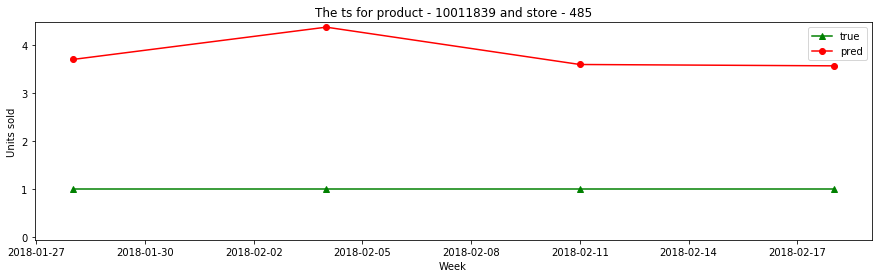

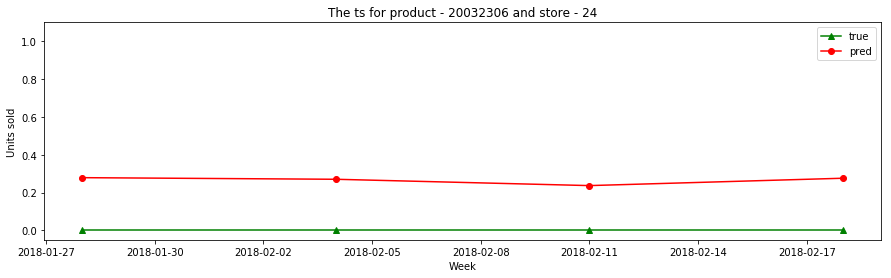

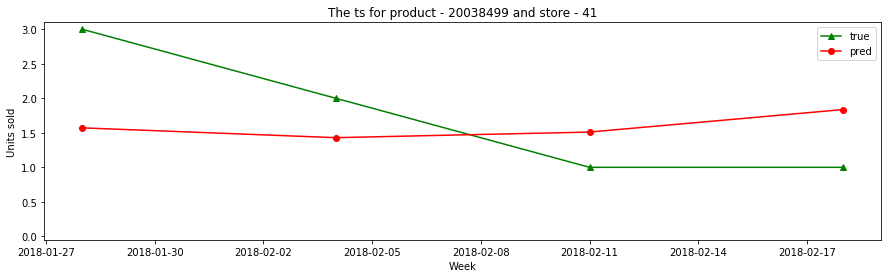

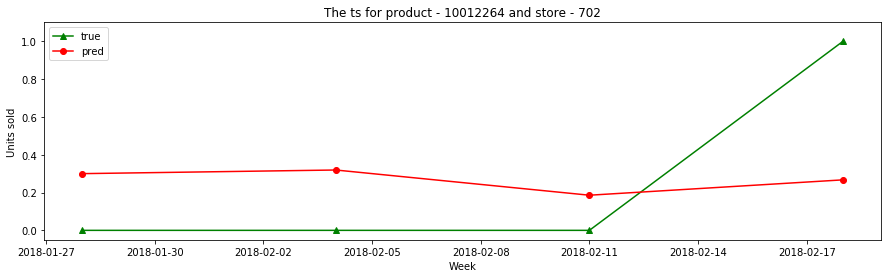

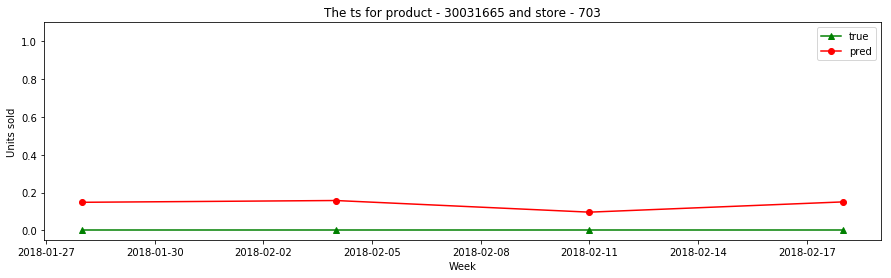

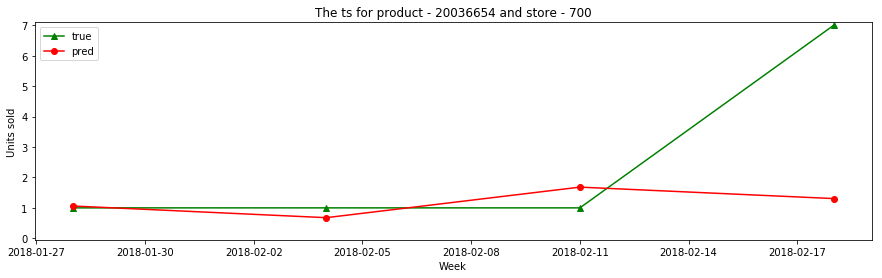

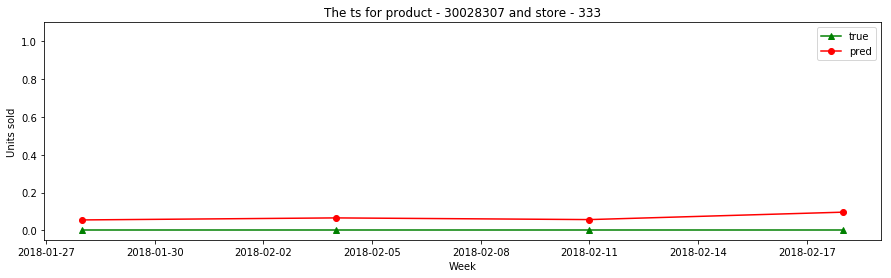

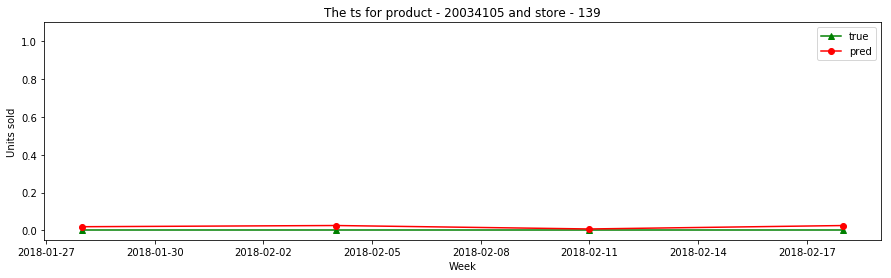

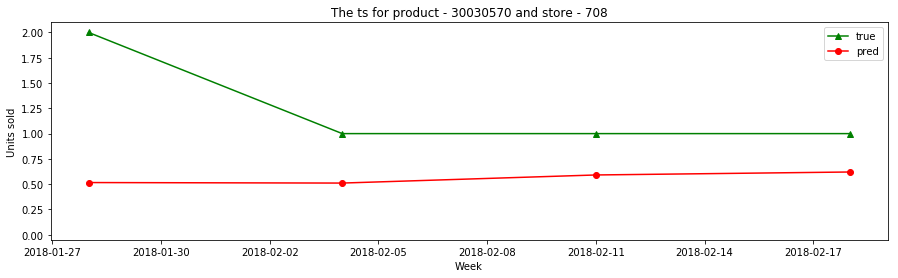

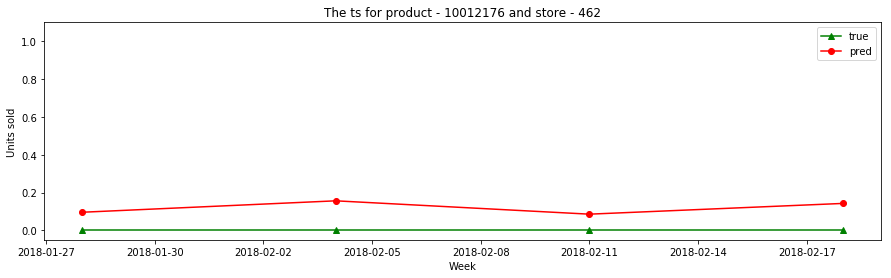

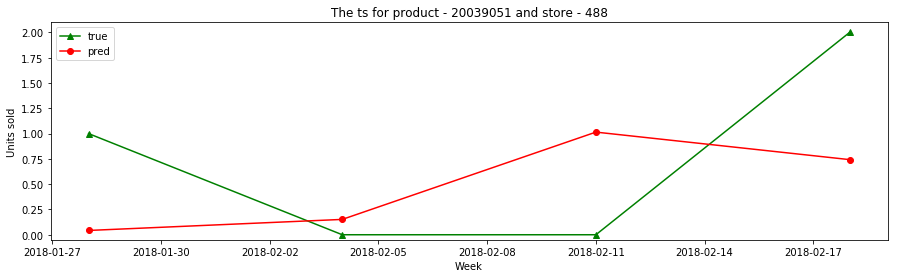

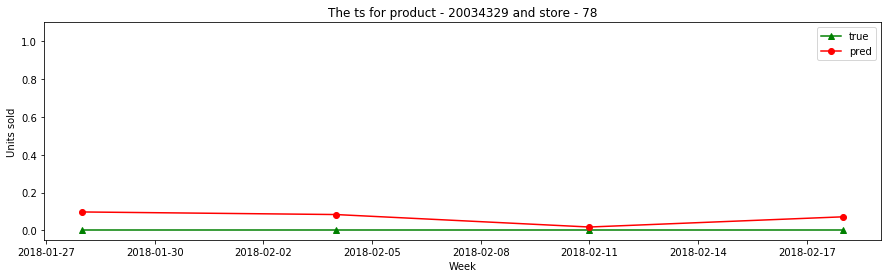

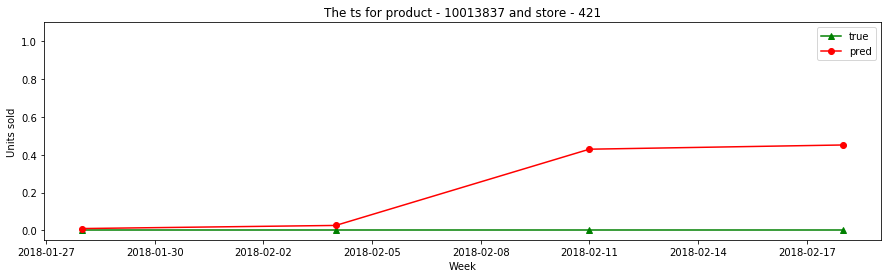

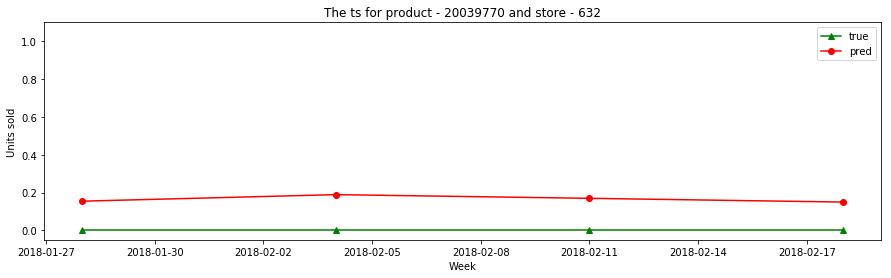

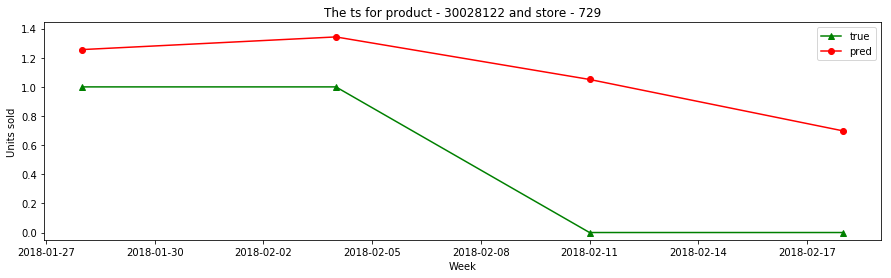

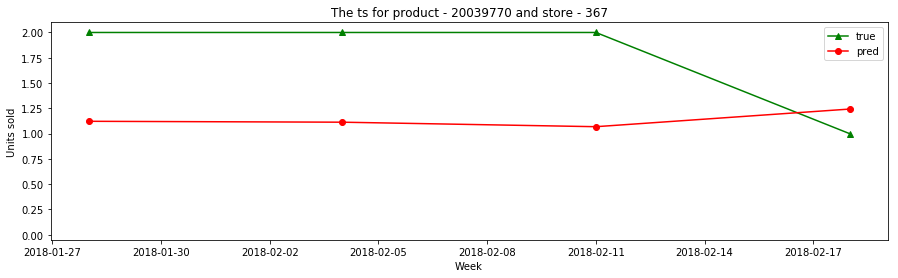

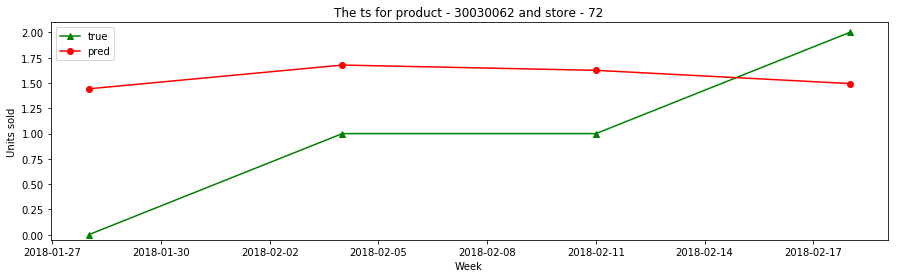

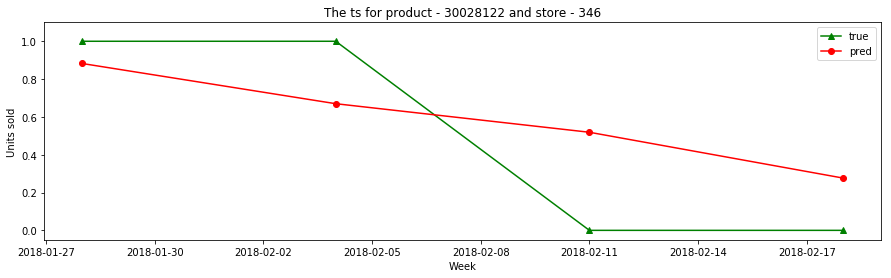

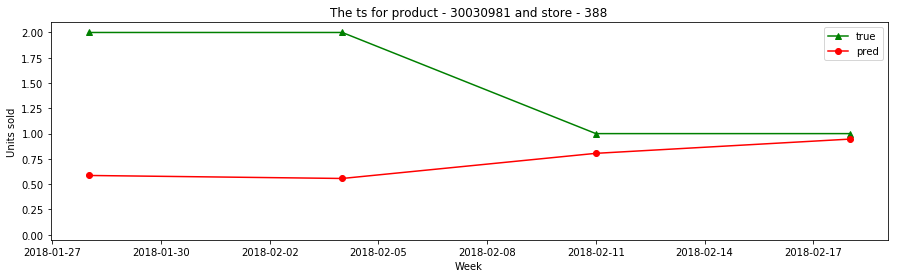

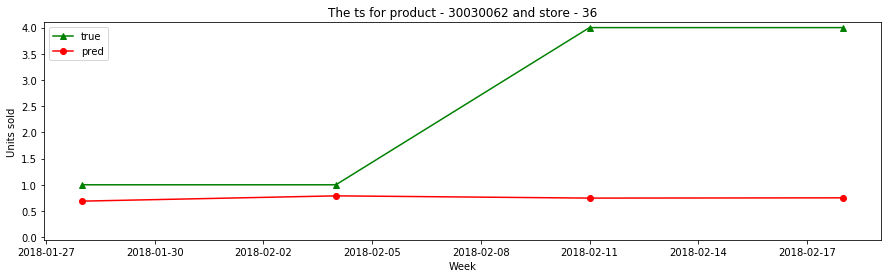

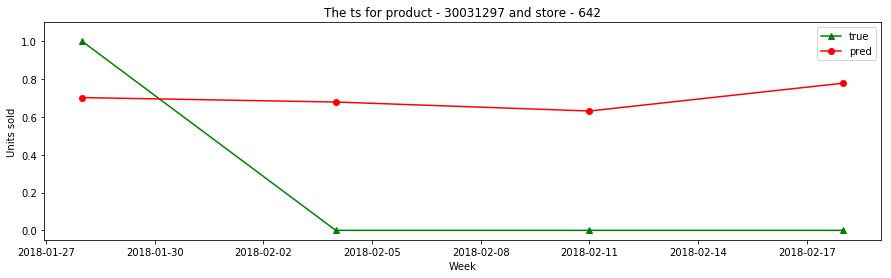

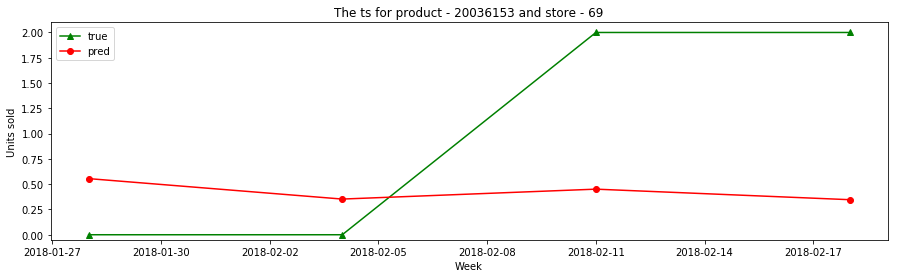

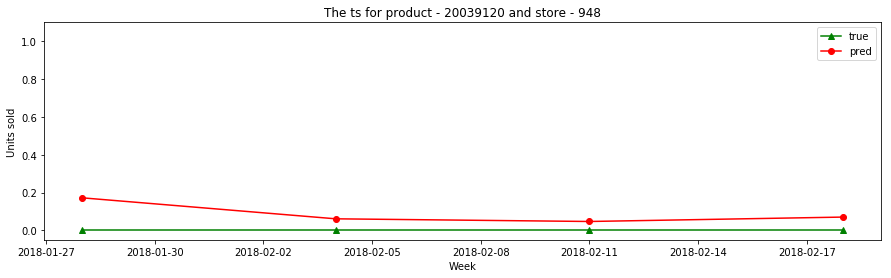

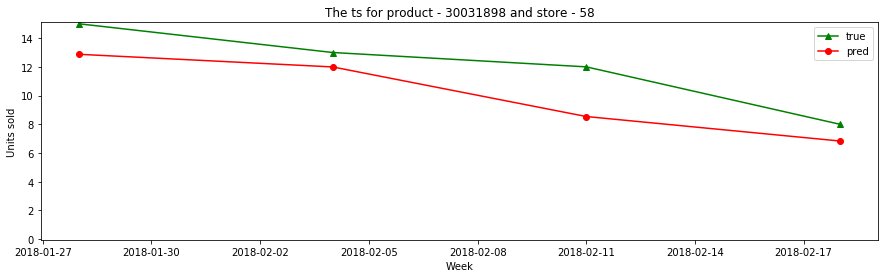

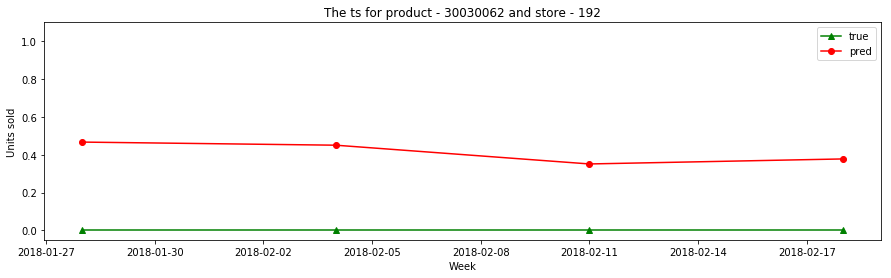

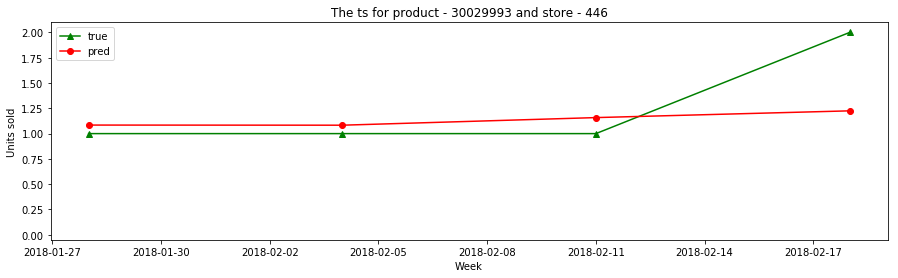

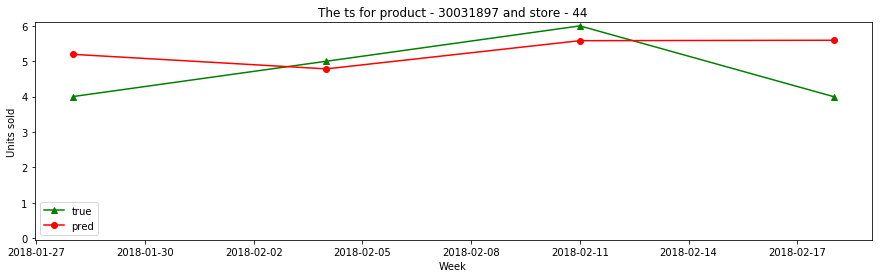

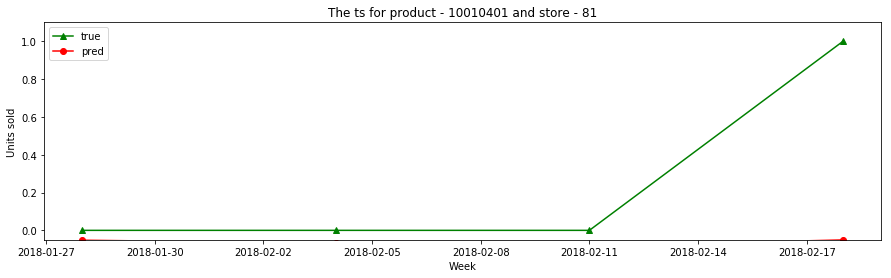

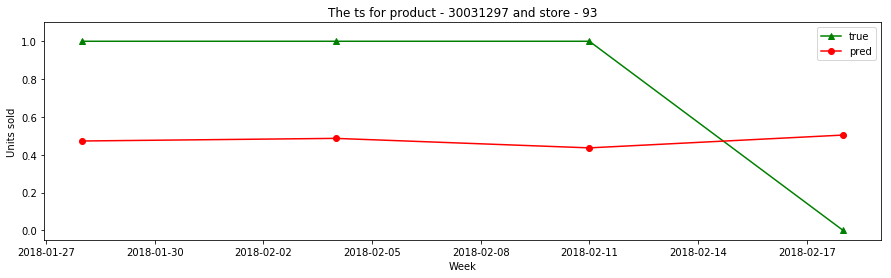

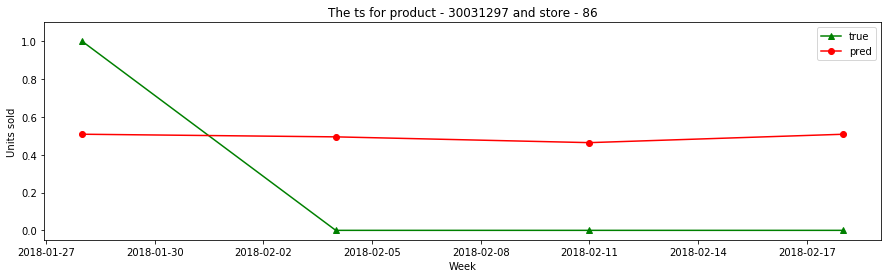

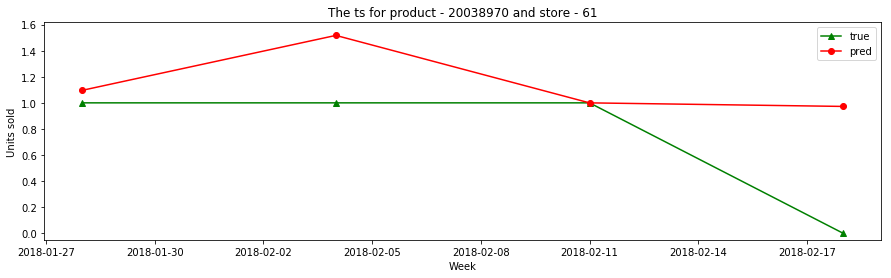

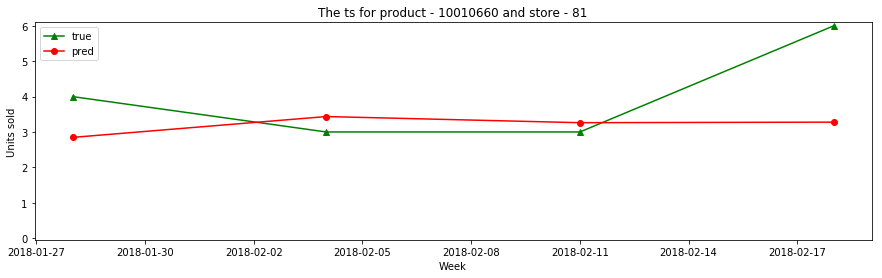

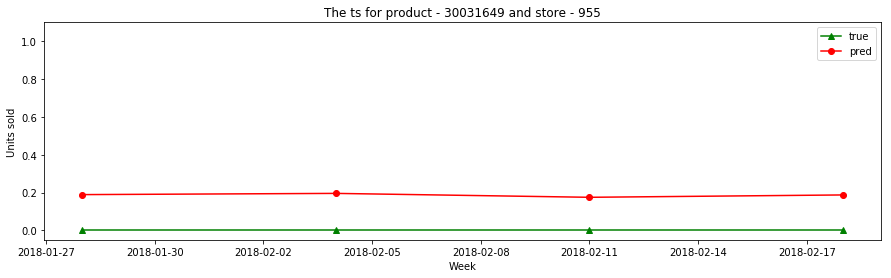

In [26]:
pairs = list(set(zip(res['STORE_ID'], res['PRODUCT_ID'])))

for i in range(len(pairs) // 1000):
    store_id, product_id = pairs[i]
    plot_ts(res, store_id, product_id)

In [27]:
dts2 = lgb.Dataset(data_train2[feat], label = data_train2.UNITS_SOLD_P2)

In [28]:
dts2 = dts2.construct()

In [29]:
bst.current_iteration()

1827

In [30]:
bst2 = lgb.train(params, dts2, num_boost_round = bst.current_iteration())

In [31]:
pred3 = bst2.predict(data_test[feat])

In [32]:
np.sqrt(mean_squared_error(data_test.UNITS_SOLD_P2, pred3))

1.4576049494654837

In [33]:
mean_absolute_error(data_test.UNITS_SOLD_P2, pred3)

0.8793453589898138

In [34]:
sc = bst2.feature_importance(importance_type='gain')

In [35]:
score = pd.DataFrame(100 * sc / np.sum(sc),
                     index = bst2.feature_name(), columns = ['Score'])

In [36]:
score = score.sort_values('Score', ascending=False)

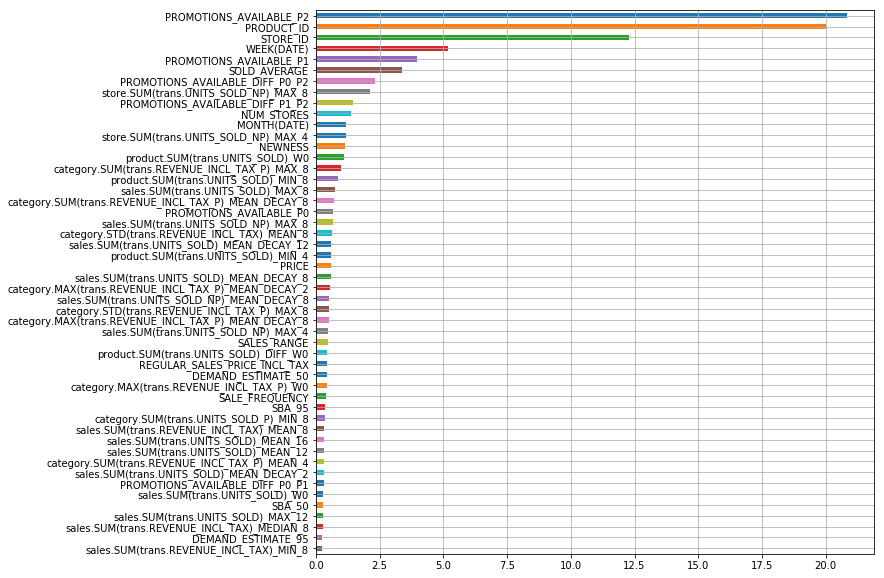

In [37]:
score.head(50).Score.plot.barh(grid=True, figsize=(10,10)).invert_yaxis()

In [38]:
res2 = data_test[['PRODUCT_ID', 'STORE_ID']].copy()

In [39]:
res2['PRED'] = pred3

In [40]:
res3 = pd.read_parquet('/main/data/MVideo_2/dataset_test_6.parquet')

In [41]:
res3 = res3[(res3.DATE > '2018-04-15') & (res3.DATE <= '2018-05-13')].copy()

In [42]:
res3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139160 entries, 139160 to 278319
Data columns (total 4 columns):
STORE_ID      139160 non-null category
PRODUCT_ID    139160 non-null category
DATE          139160 non-null datetime64[ns]
UNITS_SOLD    139160 non-null float64
dtypes: category(2), datetime64[ns](1), float64(1)
memory usage: 3.8 MB


In [43]:
res3 = res3.merge(res2)

In [44]:
res3.PRED /= 4

In [45]:
res3.PRED.clip(lower = 0, inplace = True)

In [46]:
res3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139160 entries, 0 to 139159
Data columns (total 5 columns):
STORE_ID      139160 non-null category
PRODUCT_ID    139160 non-null category
DATE          139160 non-null datetime64[ns]
UNITS_SOLD    139160 non-null float64
PRED          139160 non-null float64
dtypes: category(2), datetime64[ns](1), float64(2)
memory usage: 4.8 MB


In [47]:
np.sqrt(mean_squared_error(res3.UNITS_SOLD, res3.PRED))

0.6112348230347115

In [48]:
mean_absolute_error(res3.UNITS_SOLD, res3.PRED)

0.34382785212627714

In [49]:
res3.to_parquet('/main/data/MVideo_2/results_6_m_2.parquet')